This notebook imports population that was build using US_Population_By_State_Final.ipynb and then use the Gun_Sales data taken from https://github.com/singparvi/nics-firearm-background-checks. This source uses https://www.fbi.gov/services/cjis/nics database to collect the data and provide in a CSV format.

In [45]:
# import major libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import calendar
url = 'https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv'

df = pd.read_csv(url)

In [46]:
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020-12,Alabama,33421.0,505.0,31103.0,28933.0,1855.0,1388,0.0,43.0,...,0.0,0.0,0.0,30.0,23.0,5.0,2.0,3.0,0.0,100927
1,2020-12,Alaska,441.0,3.0,3658.0,3822.0,430.0,233,0.0,0.0,...,0.0,0.0,0.0,9.0,10.0,1.0,0.0,1.0,0.0,8896
2,2020-12,Arizona,9043.0,846.0,25093.0,14562.0,1942.0,1395,0.0,12.0,...,0.0,0.0,0.0,21.0,8.0,3.0,0.0,1.0,0.0,54547
3,2020-12,Arkansas,3878.0,900.0,10987.0,12719.0,587.0,510,9.0,12.0,...,0.0,0.0,0.0,2.0,14.0,1.0,0.0,2.0,0.0,31618
4,2020-12,California,26034.0,1788.0,59909.0,39389.0,6932.0,0,0.0,0.0,...,14.0,0.0,0.0,523.0,27.0,0.0,59.0,21.0,0.0,135442


## Plot MoM US Gun Sales data in a line plot from 2000-2020

In [47]:
# plotting monthly sales across US
monthly_sales =  pd.pivot_table(data = df, index = 'month', columns= 'state', values= 'totals')
monthly_sales = monthly_sales.reset_index()
monthly_sales['total'] = monthly_sales.iloc[:,1:].sum(axis = 1)
monthly_sales = monthly_sales[~((monthly_sales.month.str.contains('1998')) | (monthly_sales.month.str.contains('1999')) | (monthly_sales.month.str.contains('2000')))]
monthly_sales.head()

state,month,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,total
26,2001-01,17733,2409,11279,12669,60935,23654,7118,1096,0,...,51492,4637,1030,0,13793,11703,9167,10043,2456,633916
27,2001-02,18828,2343,12700,14916,58904,23686,6485,1077,1,...,51017,5574,1460,0,15198,11536,10844,13312,2598,666352
28,2001-03,18034,2912,12450,13680,65127,29331,7482,1234,3,...,52984,5295,1750,0,15645,13278,11306,17988,2713,720477
29,2001-04,12565,3398,10565,9014,77120,23024,6894,929,3,...,38409,4622,1615,0,11970,11289,8399,14239,2390,583762
30,2001-05,12138,2965,10058,8581,76603,21077,6879,918,3,...,40931,3728,1031,0,11315,10471,7406,8868,2338,532437


In [48]:
import plotly.express as px
# # # making a line plot in order to explain the events over the history of sales increases
fig = px.line(data_frame= monthly_sales, x = 'month', y = 'total', title= 'US Annual Gun Sales')
fig.update_layout(title_x = 0.5, xaxis_tickformat = '%Y-%B')
fig.show()
# uncomment to export the html file in local directory
# import plotly.io as pio
# pio.write_html(fig, file='US_MoM_Gun_Sales.html', auto_open=False)

In [49]:
# Chaning month to datetime format as it is defined as object earlier
df['month'] =pd.to_datetime(df['month'])
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020-12-01,Alabama,33421.0,505.0,31103.0,28933.0,1855.0,1388,0.0,43.0,...,0.0,0.0,0.0,30.0,23.0,5.0,2.0,3.0,0.0,100927
1,2020-12-01,Alaska,441.0,3.0,3658.0,3822.0,430.0,233,0.0,0.0,...,0.0,0.0,0.0,9.0,10.0,1.0,0.0,1.0,0.0,8896
2,2020-12-01,Arizona,9043.0,846.0,25093.0,14562.0,1942.0,1395,0.0,12.0,...,0.0,0.0,0.0,21.0,8.0,3.0,0.0,1.0,0.0,54547
3,2020-12-01,Arkansas,3878.0,900.0,10987.0,12719.0,587.0,510,9.0,12.0,...,0.0,0.0,0.0,2.0,14.0,1.0,0.0,2.0,0.0,31618
4,2020-12-01,California,26034.0,1788.0,59909.0,39389.0,6932.0,0,0.0,0.0,...,14.0,0.0,0.0,523.0,27.0,0.0,59.0,21.0,0.0,135442


In [50]:
# making separate columns for month and year
df['month'][0].year

{m: i for i, m in enumerate(calendar.month_abbr) if m}

def to_year(string):
    return string.year

def to_month(string):
    return string.month
df_new = df
df_new['year'] = df['month'].apply(to_year)
df_new['month'] = df['month'].apply(to_month)
df_new

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year
0,12,Alabama,33421.0,505.0,31103.0,28933.0,1855.0,1388,0.0,43.0,...,0.0,0.0,30.0,23.0,5.0,2.0,3.0,0.0,100927,2020
1,12,Alaska,441.0,3.0,3658.0,3822.0,430.0,233,0.0,0.0,...,0.0,0.0,9.0,10.0,1.0,0.0,1.0,0.0,8896,2020
2,12,Arizona,9043.0,846.0,25093.0,14562.0,1942.0,1395,0.0,12.0,...,0.0,0.0,21.0,8.0,3.0,0.0,1.0,0.0,54547,2020
3,12,Arkansas,3878.0,900.0,10987.0,12719.0,587.0,510,9.0,12.0,...,0.0,0.0,2.0,14.0,1.0,0.0,2.0,0.0,31618,2020
4,12,California,26034.0,1788.0,59909.0,39389.0,6932.0,0,0.0,0.0,...,0.0,0.0,523.0,27.0,0.0,59.0,21.0,0.0,135442,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14625,11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,1998
14626,11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361,1998
14627,11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408,1998
14628,11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241,1998


In [51]:
# Rearranging columns
column_list = df.columns.tolist()
df_new = df_new[['year','month','state','totals']]
df_new

,year,month,state,totals
0,2020,12,Alabama,100927
1,2020,12,Alaska,8896
2,2020,12,Arizona,54547
3,2020,12,Arkansas,31618
4,2020,12,California,135442
...,...,...,...,...
14625,1998,11,Virginia,24
14626,1998,11,Washington,361
14627,1998,11,West Virginia,408
14628,1998,11,Wisconsin,241


In [52]:
# find the number of unique value in a column 
df_new['state'].nunique()

55

In [53]:
# importing states codes for plotly
state_code_url = 'https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv'
state_codes = pd.read_csv(state_code_url)
state_codes = state_codes[['code', 'state']]
# df_new was 14575 rows × 28 columns

#merging guns_sales with state codes
guns_sales = pd.merge(df_new, state_codes, on = 'state')
# guns_sales is 13250 rows × 29 columns

condition = (guns_sales['year'] == 1998) | (guns_sales['year'] == 1999) | (guns_sales['year'] == 2000)
# removing the data for 1998, 1999 and 2000
guns_sales = guns_sales.drop(labels= guns_sales[condition].index, axis=0)
guns_sales = guns_sales[['year', 'month', 'state', 'totals', 'code']]
# guns_sales is now 11950 rows vs 13250 rows earlier and 98,99 and 00 year data is dropped
# along with not required columns
guns_sales


,year,month,state,totals,code
0,2020,12,Alabama,100927,AL
1,2020,11,Alabama,91839,AL
2,2020,10,Alabama,80934,AL
3,2020,9,Alabama,80478,AL
4,2020,8,Alabama,85347,AL
...,...,...,...,...,...
13269,2001,5,Wyoming,2338,WY
13270,2001,4,Wyoming,2390,WY
13271,2001,3,Wyoming,2713,WY
13272,2001,2,Wyoming,2598,WY


In [54]:
# Making a new column with code_year for df_new DF to merge population from us_pop
guns_sales['year'] = guns_sales['year'].apply(str)
guns_sales['code_year'] = guns_sales['code'] + guns_sales['year']
guns_sales

,year,month,state,totals,code,code_year
0,2020,12,Alabama,100927,AL,AL2020
1,2020,11,Alabama,91839,AL,AL2020
2,2020,10,Alabama,80934,AL,AL2020
3,2020,9,Alabama,80478,AL,AL2020
4,2020,8,Alabama,85347,AL,AL2020
...,...,...,...,...,...,...
13269,2001,5,Wyoming,2338,WY,WY2001
13270,2001,4,Wyoming,2390,WY,WY2001
13271,2001,3,Wyoming,2713,WY,WY2001
13272,2001,2,Wyoming,2598,WY,WY2001


In [55]:
# making a new column in guns_sales to match US_Population_1990-2020.csv generated from US_Population_By_State_Final.ipynb
guns_sales['month'] = guns_sales['month'].apply(str)
guns_sales['code'] = guns_sales['code'].apply(str)
guns_sales['year'] = guns_sales['year'].apply(str)
guns_sales['vlookup'] = guns_sales['code'] + "+" + guns_sales['year']   + "+" + guns_sales['month'] 
guns_sales

,year,month,state,totals,code,code_year,vlookup
0,2020,12,Alabama,100927,AL,AL2020,AL+2020+12
1,2020,11,Alabama,91839,AL,AL2020,AL+2020+11
2,2020,10,Alabama,80934,AL,AL2020,AL+2020+10
3,2020,9,Alabama,80478,AL,AL2020,AL+2020+9
4,2020,8,Alabama,85347,AL,AL2020,AL+2020+8
...,...,...,...,...,...,...,...
13269,2001,5,Wyoming,2338,WY,WY2001,WY+2001+5
13270,2001,4,Wyoming,2390,WY,WY2001,WY+2001+4
13271,2001,3,Wyoming,2713,WY,WY2001,WY+2001+3
13272,2001,2,Wyoming,2598,WY,WY2001,WY+2001+2


In [56]:
# importing US_Population_1990-2020.csv in which US population data was built from 1990-2000 
# using US_Population_By_State_Final.ipynb
us_pop_url = 'https://raw.githubusercontent.com/singparvi/US-Gun-Sales/main/US_Population.csv'
us_pop = pd.read_csv(us_pop_url)
us_annual_pop = us_pop[us_pop.code == 'USA']
us_annual_pop.drop(['code', 'month', 'vlookup'], axis = 1, inplace= True)

In [57]:
us_pop.drop(['code', 'year', 'month'], axis = 1, inplace = True)
us_pop

,population,vlookup
0,4817528.0,AL+2012+1
1,4785570.0,AL+2010+1
2,4801627.0,AL+2011+1
3,4757938.0,AL+2009+1
4,4833722.0,AL+2013+1
...,...,...
19423,322941311.0,USA+2016+12
19424,324985539.0,USA+2017+12
19425,326687501.0,USA+2018+12
19426,328239523.0,USA+2019+12


In [58]:
# merging the guns_sales and population DataFrame
guns_sales = guns_sales.merge(us_pop, on = 'vlookup')
guns_sales.drop(['code_year', 'vlookup'], axis = 1,inplace= True)

In [59]:
# Calculate gun_sales_per_100k
guns_sales['gun_sales_per_100k'] = guns_sales['totals'] * 1000 / guns_sales['population'] 
guns_sales.head()

,year,month,state,totals,code,population,gun_sales_per_100k
0,2020,12,Alabama,100927,AL,4926478.0,20.486644
1,2020,11,Alabama,91839,AL,4926478.0,18.641918
2,2020,10,Alabama,80934,AL,4926478.0,16.428369
3,2020,9,Alabama,80478,AL,4926478.0,16.335808
4,2020,8,Alabama,85347,AL,4926478.0,17.324141


In [60]:
# Changing month to int format
guns_sales['month'] = guns_sales['month'].apply(int)
guns_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                12000 non-null  object 
 1   month               12000 non-null  int64  
 2   state               12000 non-null  object 
 3   totals              12000 non-null  int64  
 4   code                12000 non-null  object 
 5   population          12000 non-null  float64
 6   gun_sales_per_100k  12000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 750.0+ KB


In [61]:
# change integer months to string months
import calendar

def month_int_to_str(integer):
    return calendar.month_name[integer]

guns_sales['month'] = guns_sales['month'].apply(month_int_to_str)

In [62]:
# Getting the annual sales of data and plotting it to see the trend
df_annual_data_bystate = pd.pivot_table(guns_sales, index = ['state','year',], values= 'totals', aggfunc= 'sum')
df_annual_data_bystate = df_annual_data_bystate.reset_index()

In [63]:
# another time in order to get a Data Frame of annual sales
df_annual_data_bystate = pd.pivot_table(df_annual_data_bystate, index = 'year', values= 'totals', aggfunc= 'sum')
df_annual_data_bystate = df_annual_data_bystate.reset_index()

In [64]:
# Changing year to int value and merging us_annual_gunsales_pop with us_annual_pop 
df_annual_data_bystate.year = df_annual_data_bystate.year.apply(int)
us_annual_gunsales_pop = df_annual_data_bystate.merge(us_annual_pop, on = 'year')
us_annual_gunsales_pop = us_annual_gunsales_pop.drop_duplicates()
us_annual_gunsales_pop = us_annual_gunsales_pop.rename(columns= {'totals': 'gun sales'})


In [65]:
## Installing chart_studio using bash

# !pip install chart_Studio

In [66]:
# use US annual gunsales along with US annual population to plot
import plotly.express as px
import chart_studio
import chart_studio.plotly as py
fig = px.bar(us_annual_gunsales_pop, x = 'year', y = 'gun sales', color = 'population', labels={'pop:population of US'}, 
             height= 900, title= 'US Annual Gun Sales and Population')
fig.update_layout(title_x = 0.5, xaxis = dict(tickmode = 'linear', tick0 = 2000, dtick = 1))
fig.update_xaxes(tickangle=90)

fig.show()
# uncomment to export the html file in local directory
# import plotly.io as pio
# pio.write_html(fig, file='Barplot_YoY_Gun_Sales_Population.html', auto_open=False)


In [67]:
us_annual_gunsales_pop.head()

,year,gun sales,population
0,2001,8812457,284968955.0
12,2002,8358574,287625193.0
24,2003,8393942,290107933.0
36,2004,8571726,292805298.0
48,2005,8857599,295516599.0


Make DataFrame using pivot table so that months are removed and there is one total for guns sold in any year

In [68]:
# Making DF to have total annual sales condensed in one row per state for any year
ann_sales_pop_bystate = pd.pivot_table(guns_sales, index = ['year', 'state', 'code','population'], values='totals', aggfunc= 'sum')
ann_sales_pop_bystate = ann_sales_pop_bystate.reset_index()
# Calculate gun_sales_per_100k
ann_sales_pop_bystate['gun_sales_per_100k'] = ann_sales_pop_bystate['totals'] * 1000 / ann_sales_pop_bystate['population'] 
ann_sales_pop_bystate.head()

,year,state,code,population,totals,gun_sales_per_100k
0,2001,Alabama,AL,4467634.0,230187,51.523245
1,2001,Alaska,AK,633714.0,39959,63.055258
2,2001,Arizona,AZ,5273477.0,147582,27.985710
3,2001,Arkansas,AR,2691571.0,166062,61.697054
4,2001,California,CA,34479458.0,854569,24.784873


## Total Annual Gun Sales and Population of US States by Year Choropleth map

In [69]:
# for total guns taken into account

# plotting the figure with animation
fig = px.choropleth(ann_sales_pop_bystate, locations = 'code', scope ='usa', locationmode='USA-states', color= 'totals',
                    hover_name= 'population', hover_data=['population'], animation_frame= 'year', 
                    color_continuous_scale='Inferno', title = 'Total Annual Gun Sales and Population of US States by Year', labels={'totals':'total guns sales'}, height = 800
                    )
fig.update_layout(title_x = 0.5)
fig.show()

# uncomment to export the html file in local directory
# import plotly.io as pio
# pio.write_html(fig, file='Choropleth_Annual_Gun_Sales_Population.html', auto_open=False)

## Annual Gun Sales per 100k population of US States Choropleth map

In [70]:
# for PER 100k taken into account

# plotting the figure with animation
fig = px.choropleth(ann_sales_pop_bystate, locations = 'code', scope ='usa', locationmode='USA-states', color= 'gun_sales_per_100k',
                    hover_name= 'population', hover_data=['population'], animation_frame= 'year', 
                    color_continuous_scale='Inferno', title = 'Annual Gun Sales per 100k population of US States', height = 800
                    )
fig.update_layout(title_x = 0.5)
fig.show()
# uncomment to export the html file in local directory
# import plotly.io as pio
# pio.write_html(fig, file='Choropleth_Annual_Gun_Sales_100k.html', auto_open=False)

## Plotting states for 2019 to see how it looks

In [71]:
fig = px.bar(ann_sales_pop_bystate[ann_sales_pop_bystate.year == '2019'], x = 'code', y = 'totals', color = 'population', labels={'pop:population of US'}
             , height= 400, title= 'US Gun Sales for 2019 by State')
fig.update_layout(title_x = 0.5)
fig.show()

In [72]:
# upgrading plotly to remove path error in the following execution

# !pip install --upgrade plotly

## Treemap for the Population in US from 2001 to 2020.

In [73]:
# treemap for the population growth over the years
import plotly.express as px
import plotly.graph_objects as go

# We have a list for every day
# In your case will be gropuby('RuleName')
# here for every element d
# d[0] is the name(key) and d[1] is the dataframe
dfs = list(ann_sales_pop_bystate.groupby("year"))

first_title = dfs[0][0]
traces = []
buttons = []
for i,d in enumerate(dfs):
    visible = [False] * len(dfs)
    visible[i] = True
    name = d[0]
    traces.append(
        px.treemap(d[1],
                   path=['year', 'code', ],
                   values='population', title = 'US Population Treemap').update_traces(visible=True if i==0 else False).data[0]
    )
    buttons.append(dict(label=name,
                        method="update",
                        args=[{"visible":visible},
                              {"title":f"{name}"}]))

updatemenus = [{'active':0, "buttons":buttons}]

fig = go.Figure(data=traces,
                 layout=dict(updatemenus=updatemenus))
fig.update_layout(title=first_title, title_x=0.5)
fig.show()
# uncomment to export the html file in local directory
# import plotly.io as pio
# pio.write_html(fig, file='Treemap_US_Population.html', auto_open=False)

# Code to export to online portal
# uncomment to export the html file in chart_studio portal 
# import chart_studio.plotly as py
# py.plot(fig, filename= 'Treemap_US_Population', auto_open=False)

## Total Annual Gun Sales and Population of US States by Year Dropdown Menu

In [74]:
# bar plot for the guns sales per year by state
import plotly.express as px
import plotly.graph_objects as go

# We have a list for every day
# In your case will be gropuby('RuleName')
# here for every element d
# d[0] is the name(key) and d[1] is the dataframe
dfs = list(ann_sales_pop_bystate.groupby("year"))

first_title = dfs[0][0]
traces = []
buttons = []
for i,d in enumerate(dfs):
    visible = [False] * len(dfs)
    visible[i] = True
    name = d[0]
    traces.append(px.bar(d[1], x = 'code', y = 'totals', color = 'population', labels=dict(x="Fruit", y="Amount", color="Place"), height= 800).update_traces(visible=True if i==0 else False).data[0])
        # px.treemap(d[1],
        #            path=['year', 'code', ],
        #            values='population').update_traces(visible=True if i==0 else False).data[0]
        
  
    buttons.append(dict(label=name,
                        method="update",
                        args=[{"visible":visible},
                              {"title":f"{name}"}]))

updatemenus = [{'active':0, "buttons":buttons}]

fig = go.Figure(data=traces,
                 layout=dict(updatemenus=updatemenus))
fig.update_layout(title=first_title, title_x=0.5, title_text = 'Total Annual Gun Sales and Population of US States by Year ')
fig.show()
# uncomment to export the html file in local directory
# import plotly.io as pio
# pio.write_html(fig, file='Barplot_Annual_Gun_Sales_Population.html', auto_open=False)

## Total Annual Gun Sales and Population of US States Bar Chart Race

In [75]:
# !pip install raceplotly

In [76]:
# plotting bar chart and then exporting to file
from raceplotly.plots import barplot

my_raceplot = barplot(ann_sales_pop_bystate, item_column= 'state',value_column= 'totals', time_column='year', top_entries= 15)
a = my_raceplot.plot(title = 'Total Annual Gun Sales Bar Chart Race', item_label= 'US States', value_label= 'Gun Sales', time_label= 'Year = ', frame_duration= 800, orientation= 'vertical')
a.show()
# uncomment to export the html file in local directory
# import plotly.io as pio
# pio.write_html(a, file='BarChartRace_Annual_Gun_Sales_Population.html', auto_open=False)

# uncomment to export on chart studio online
# import plotly.express as px
# import chart_studio
# username = 'ParviSingh' # username
# api_key = 'DnzTYZDKcRkOHSePo4kQ' #  api key - go to profile > settings > regenerate key
# chart_studio.tools.set_credentials_file(username= username, api_key= api_key)
# import chart_studio.plotly as py
# py.plot(a, filename= 'BarChartRace_Annual_Gun_Sales_Population', auto_open=True)

## Annual Gun Sales per 100k population of US States by Year Dropdown Menu

In [77]:
# bar plot for the guns sales per 100k people by state in any year
import plotly.express as px
import plotly.graph_objects as go

# We have a list for every day
# In your case will be gropuby('RuleName')
# here for every element d
# d[0] is the name(key) and d[1] is the dataframe
dfs = list(ann_sales_pop_bystate.groupby("year"))

first_title = dfs[0][0]
traces = []
buttons = []
for i,d in enumerate(dfs):
    visible = [False] * len(dfs)
    visible[i] = True
    name = d[0]
    traces.append(px.bar(d[1], x = 'code', y = 'gun_sales_per_100k', color = 'population', width= 200, height= 200).update_traces(visible=True if i==0 else False).data[0])
        # px.treemap(d[1],
        #            path=['year', 'code', ],
        #            values='population').update_traces(visible=True if i==0 else False).data[0]
        
  
    buttons.append(dict(label=name,
                        method="update",
                        args=[{"visible":visible},
                              {"title":f"{name}"}]))

updatemenus = [{'active':0, "buttons":buttons}]

fig = go.Figure(data=traces,
                 layout=dict(updatemenus=updatemenus))
fig.update_layout(title=first_title, title_x=0.5, title_text = 'Annual Gun Sales per 100k population of US States by Year ')
fig.show()

# uncomment to export the html file in local directory
# import plotly.io as pio
# pio.write_html(fig, file='Barplot_Annual_Gun_Sales_100k.html', auto_open=False)

## Annual Gun Sales per 100k population of US States Bar Chart Race

In [78]:
# plotting bar chart and then exporting to file
from raceplotly.plots import barplot

my_raceplot = barplot(ann_sales_pop_bystate, item_column= 'state',value_column= 'gun_sales_per_100k', time_column='year', top_entries= 15)
a = my_raceplot.plot(title = 'Annual Gun Sales per 100k population of US States by Year Bar Chart Race', item_label= 'US States', value_label= 'Gun Sales per 100k population', time_label= 'Year = ', frame_duration= 800, orientation= 'vertical')
a.show()
# uncomment to export the html file in local directory
# import plotly.io as pio
# pio.write_html(a, file='BarChartRace_Annual_Gun_Sales_100k.html', auto_open=False)

#plotting online on chart studio
# chart_studio.tools.set_credentials_file(username= username, api_key= api_key)
# import chart_studio.plotly as py
# py.plot(a, filename= 'BarChartRace_Annual_Gun_Sales_100k', auto_open=True)

The following section will do statistical tests to find the correlation between population and sales.

In [79]:
# Convert population and year to int format
ann_sales_pop_bystate['population'] = ann_sales_pop_bystate['population'].apply(int)
ann_sales_pop_bystate['year'] = ann_sales_pop_bystate['year'].apply(int)
ann_sales_pop_bystate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                1000 non-null   int64  
 1   state               1000 non-null   object 
 2   code                1000 non-null   object 
 3   population          1000 non-null   int64  
 4   totals              1000 non-null   int64  
 5   gun_sales_per_100k  1000 non-null   float64
 6   color               1000 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


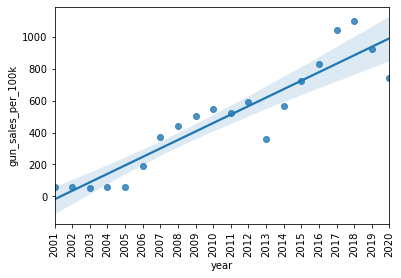

The correlation coefficient for gun_sales_per_100k and year for Kentucky state is 0.93 
 
 
                            OLS Regression Results                            
Dep. Variable:     gun_sales_per_100k   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     111.4
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           3.86e-09
Time:                        01:56:30   Log-Likelihood:                -124.66
No. Observations:                  20   AIC:                             253.3
Df Residuals:                      18   BIC:                             255.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [80]:
## Followig data analysis is for Kentucky State

# plotting KY_Data as regression
KY_data = ann_sales_pop_bystate[ann_sales_pop_bystate.code == 'KY']
sns.regplot(KY_data['year'], KY_data['gun_sales_per_100k'])
xvalue = KY_data['year']
plt.xticks(xvalue, rotation=90)
plt.show()

# finding the correlation coefficient for KY_data
r = np.corrcoef(KY_data['year'], KY_data['gun_sales_per_100k'])
print ('The correlation coefficient for gun_sales_per_100k and year for Kentucky state is', np.round(r[0,1], decimals= 2), '\n \n ')

# running the ols model of regression fitting on KY_data
from statsmodels.formula.api import ols
model = ols('gun_sales_per_100k ~ year', data = KY_data).fit()
print (model.summary())

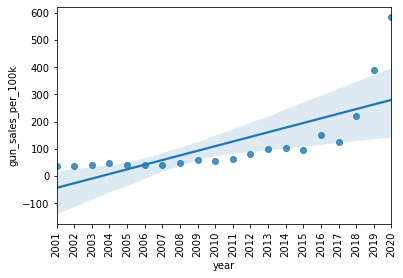

The correlation coefficient for gun_sales_per_100k and year for Illinois state is 0.73 
 
 
                            OLS Regression Results                            
Dep. Variable:     gun_sales_per_100k   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     20.26
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           0.000277
Time:                        01:56:31   Log-Likelihood:                -118.94
No. Observations:                  20   AIC:                             241.9
Df Residuals:                      18   BIC:                             243.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [81]:
## Followig data analysis is for Illinois State

# plotting IL_Data as regression
IL_data = ann_sales_pop_bystate[ann_sales_pop_bystate.code == 'IL']
sns.regplot(IL_data['year'], IL_data['gun_sales_per_100k'])
xvalue = IL_data['year']
plt.xticks(xvalue, rotation=90)
plt.show()

# finding the correlation coefficient for IL_data
r = np.corrcoef(IL_data['year'], IL_data['gun_sales_per_100k'])
print ('The correlation coefficient for gun_sales_per_100k and year for Illinois state is', np.round(r[0,1], decimals = 2), '\n \n ')

# running the ols model of regression fitting on IL_data
from statsmodels.formula.api import ols
model = ols('gun_sales_per_100k ~ year', data = IL_data).fit()
print (model.summary())


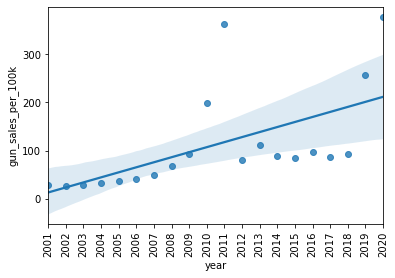

The correlation coefficient for gun_sales_per_100k and year for Utah state is 0.59 
 
 
                            OLS Regression Results                            
Dep. Variable:     gun_sales_per_100k   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     9.520
Date:                Fri, 15 Jan 2021   Prob (F-statistic):            0.00638
Time:                        01:56:31   Log-Likelihood:                -116.69
No. Observations:                  20   AIC:                             237.4
Df Residuals:                      18   BIC:                             239.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [82]:
## Followig data analysis is for Utah State

# plotting UT_Data as regression
UT_data = ann_sales_pop_bystate[ann_sales_pop_bystate.code == 'UT']
sns.regplot(UT_data['year'], UT_data['gun_sales_per_100k'])
xvalue = UT_data['year']
plt.xticks(xvalue, rotation=90)
plt.show()

# finding the correlation coefficient for UT_data
r = np.corrcoef(UT_data['year'], UT_data['gun_sales_per_100k'])
print ('The correlation coefficient for gun_sales_per_100k and year for Utah state is', np.round(r[0,1],decimals=2), '\n \n ')

# running the ols model of regression fitting on UT_data
from statsmodels.formula.api import ols
model = ols('gun_sales_per_100k ~ year', data = UT_data).fit()
print (model.summary())